In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import imageio
import matplotlib.pyplot as plt

def gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    return g

def flip_img(horizontal_flip, tr_img, label_img):
    if horizontal_flip:
        flip_prob = tf.random_uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
    return tr_img, label_img

def get_img_pair(test=False):
    train = "train/images/"
    mask = "train/masks/"
    file_list = os.listdir(train)
    num = 1
    if test:
        num = np.random.randint(0,len(file_list))-1
    name = file_list[num]
    print(name)
    train_path = train + name
    mask_path = mask + name
    t_im = imageio.imread(train_path)
    m_im = imageio.imread(mask_path)
    t_im = gray(t_im)/255
    m_im = m_im/65535
    return t_im, m_im

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Imports; a function to get just one grey value, one to randomly flip an image, and one to normalize the image between 0 and 1.

In [ ]:
class usenet:
    
    def conv_block(in_img, num_filters, k_size):
        c_0 = tf.layers.conv2d(in_img, num_filters, k_size, activation=tf.nn.relu)
        n_0 = tf.layers.batch_normalization(c_0)
        c_1 = tf.layers.conv2d(in_img, num_filters, k_size, activation=tf.nn.relu)
        n_1 = tf.layers.batch_normalization(c_0)
        return n_1
    
    def deconv_block(in_tens, concat_tens, num_filters, k_size):
        t_0 = tf.layers.conv2d_transpose(in_tens, num_filters, 2, strides=(2,2), activation=tf.nn.relu)
        concat = tf.concat([concat_tens, t_0], -1)
        n_0 = tf.layers.batch_normalization(concat)
        c_0 = conv_block(n_0, num_filters, k_size)
        c_1 = conv_block(c_0, num_filters, k_size)
        return c_1
    
    def __init__(input_size=[?,101,101,1]):
        k_size = 3
        self.inp = tf.placeholder(size=input_size, dtype=tf.float32)
        ff_0 = tf.layers.dense(self.inp, [?,96,96,1], activation=tf.nn.relu)
        #96
        c_0 = conv_block(in_img, 32, k_size)
        p_0 = tf.layers.max_pooling2d(c_0, (2,2), strides=(2,2))
        #48
        c_1 = conv_block(p_0, 64, k_size)
        p_1 = tf.layers.max_pooling2d(c_1, (2,2), strides=(2,2))
        #25
        c_2 = conv_block(p_1, 128, k_size)
        p_2 = tf.layers.max_pooling2d(c_2, (2,2), strides=(2,2))
        #12
        c_3 = conv_block(p_2, 256, k_size)
        p_3 = tf.layers.max_pooling2d(c_3, (2,2), strides=(2,2))
        #6
        center = conv_block(p_3, 512, k_size)
        
        d_0 = deconv_block(center, c_3, 256, k_size)
        #12
        d_1 = deconv_block(d_0, c_2, 256, k_size)
        #24
        d_2 = deconv_block(d_1, c_1, 256, k_size)
        #48
        d_3 = deconv_block(d_2, c_0, 256, k_size)
        #96
        c_4 = tf.layers.conv2d(d_3, 1, (1,1), activation=tf.nn.relu)
        
        self.output = tf.layers.dense(c_4, [?,101,101,1], activation = tf.nn.relu)

a94450f57e.png


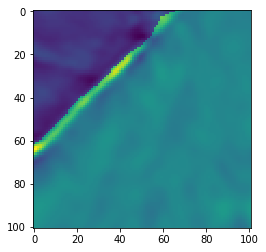

In [4]:
t_im, m_im = get_img_pair()
s_im = (t_im)*((m_im)+.5)
imgplot = plt.imshow(s_im)
plt.show()

Visualization of the data, with the mask of the solution covering it.

In [41]:
rounds = 100000
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(rounds):
        

2218


TypeError: must be str, not int